In [ ]:
# Importing twitter sentiment dataset, for this first copy the API command from kaggle account and then put ! and paste
# API to fetch the dataset from kaggle
! kaggle datasets download -d emineyetm/fake-news-detection-datasets

Dataset URL: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
License(s): unknown
 61% 25.0M/41.0M [00:00<00:00, 33.7MB/s]
100% 41.0M/41.0M [00:01<00:00, 41.9MB/s]


In [ ]:
# Extracting the compressed(zip) dataset file
from zipfile import ZipFile
dataset = '/content/fake-news-detection-datasets.zip' # path

# Open/read zip file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
true = pd.read_csv('/content/News _dataset/True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake = pd.read_csv('/content/News _dataset/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true['label'] = 1

In [ ]:
fake['label'] = 0

In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
# Merge/Concatenate True and Fake news row-wise
news = pd.concat([fake, true], axis=0)

In [ ]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
print(news.columns)  # Print the column names

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [ ]:
news = news.drop(['title', 'subject', 'date'], axis=1) # drop unused column

In [ ]:
# Checking the number of rows and columns
news.shape

(44898, 2)

In [ ]:
# Checking the distribution of target column
news['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [ ]:
# Save cleaned dataset
news.to_csv('news.csv', index=False)

In [ ]:
# Take entire data and reshuffle it
news = news.sample(frac=1)

In [ ]:
news.head()

,text,label
7478,BRUSSELS (Reuters) - Belgium’s anti-Muslim and...,1
1289,As liberals are fighting over a picture posted...,0
16027,JPMorgan Chase CEO Jamie Dimon went on a rant ...,0
21615,"Remember the racist, Black Panther punk who st...",0
8370,The Republican Party has spent more than seven...,0


In [ ]:
# Reset index
news.reset_index(inplace=True)

In [ ]:
news.head()

,index,text,label
0,7478,BRUSSELS (Reuters) - Belgium’s anti-Muslim and...,1
1,1289,As liberals are fighting over a picture posted...,0
2,16027,JPMorgan Chase CEO Jamie Dimon went on a rant ...,0
3,21615,"Remember the racist, Black Panther punk who st...",0
4,8370,The Republican Party has spent more than seven...,0


In [ ]:
news.drop(['index'], axis=1, inplace=True)

In [ ]:
news.head()

,text,label
0,BRUSSELS (Reuters) - Belgium’s anti-Muslim and...,1
1,As liberals are fighting over a picture posted...,0
2,JPMorgan Chase CEO Jamie Dimon went on a rant ...,0
3,"Remember the racist, Black Panther punk who st...",0
4,The Republican Party has spent more than seven...,0


In [ ]:
import re  # Regular expression


In [ ]:
def wordopt(text):
  # Convert into lowercase
  text = text.lower()

  # Remove URLs
  text = re.sub(r'https?://\S+|www\.\S+', '', text)

  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

  # Remove Punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Remove Digits
  text = re.sub(r'\d', '', text)

  # Remove newline characters
  text = re.sub(r'\n', ' ', text)

  return text

In [ ]:
news['text'] = news['text'].apply(wordopt)

In [ ]:
news['text']

0        brussels reuters  belgiums antimuslim and sepa...
1        as liberals are fighting over a picture posted...
2        jpmorgan chase ceo jamie dimon went on a rant ...
3        remember the racist black panther punk who sta...
4        the republican party has spent more than seven...
                               ...                        
44893    donald trump continues to be a national embarr...
44894    in  tennessee lawmakers passed a bill which le...
44895    the notoriously violent ms street gang known f...
44896    berlin reuters  two aging holocaust survivors ...
44897    berlin reuters  germany warned on wednesday it...
Name: text, Length: 44898, dtype: object

In [ ]:
x = news['text']
y = news['label']

In [ ]:
x

0        brussels reuters  belgiums antimuslim and sepa...
1        as liberals are fighting over a picture posted...
2        jpmorgan chase ceo jamie dimon went on a rant ...
3        remember the racist black panther punk who sta...
4        the republican party has spent more than seven...
                               ...                        
44893    donald trump continues to be a national embarr...
44894    in  tennessee lawmakers passed a bill which le...
44895    the notoriously violent ms street gang known f...
44896    berlin reuters  two aging holocaust survivors ...
44897    berlin reuters  germany warned on wednesday it...
Name: text, Length: 44898, dtype: object

In [ ]:
# Split data into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
x_train.shape

(31428,)

In [ ]:
x_test.shape

(13470,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()

In [ ]:
xv_train = vectorization.fit_transform(x_train)

In [ ]:
xv_train

<31428x174915 sparse matrix of type '<class 'numpy.float64'>'
	with 6478967 stored elements in Compressed Sparse Row format>

In [ ]:
xv_test = vectorization.transform(x_test)

In [ ]:
xv_test

<13470x174915 sparse matrix of type '<class 'numpy.float64'>'
	with 2701601 stored elements in Compressed Sparse Row format>

In [ ]:
# Create Ml model
# Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9876763177431329

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7002
           1       0.99      0.99      0.99      6468

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train, y_train)


DecisionTreeClassifier()

In [ ]:
pred_dtc = dtc.predict(xv_test)

In [ ]:
dtc.score(xv_test, y_test)

0.9971789161098737

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7002
           1       1.00      1.00      1.00      6468

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = rfc.predict(xv_test)

In [ ]:
rfc.score(xv_test, y_test)

0.9892353377876764

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7002
           1       0.99      0.99      0.99      6468

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [ ]:
pred_gbc = gbc.predict(xv_test)

In [ ]:
gbc.score(xv_test, y_test)

0.9956198960653304

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7002
           1       0.99      1.00      1.00      6468

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_lr)
cm

array([[6984,   18],
       [  20, 6448]])

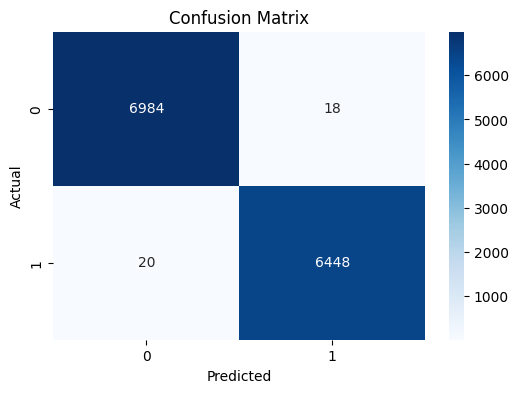

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def output_label(n):
  if n==0:
    return 'It is fake news'
  elif n==1:
    return 'It is genuine news'

In [ ]:
def manual_testing(news):
  testing_news = {"text" : [news]} # Corrected syntax for defining
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test) # Assuming vectorization is vectorization object
  prd_lr = LR.predict(new_xv_test)
  # prd_dtc = dtc.predict(new_xv_test)
  prd_dtf = gbc.predict(new_xv_test)
  prd_rfc = rfc.predict(new_xv_test)
  return "\n\LR Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(pred_lr[0]), output_label(pred_gbc[0]), output_label(pred_rfc[0]))


In [ ]:
news_articles = str(input("Enter news: "))


Enter news: It's fabulous


In [ ]:
manual_testing(news_articles)

'\n\\LR Prediction: It is genuine news \nGBC Prediction: It is fake news \nRFC Prediction: It is genuine news'